In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import tensorflow as tf


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
import pathlib

data_dir = pathlib.Path('/content/drive/MyDrive/DL notebooks/flower_photos')
# List first 5 image file paths
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/17165583356_38cb1f231d_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/7002703410_3e97b29da5_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/12949131454_4d3392f4dd_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/8708856019_f3be2353a4_n.jpg')]

In [ ]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count

3680

In [ ]:
dandelion=  list(data_dir.glob('dandelion/*.jpg'))
dandelion[:5]


[PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/dandelion/8915661673_9a1cdc3755_m.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/dandelion/4510350093_3700064215.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/dandelion/8740218495_23858355d8_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/dandelion/2608937632_cfd93bc7cd.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/dandelion/8220011556_28e0cab67f.jpg')]

In [ ]:
sunflower =  list(data_dir.glob('sunflowers/*.jpg'))
sunflower[:5]


[PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/sunflowers/3749091071_c146b33c74_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/sunflowers/16616096711_12375a0260_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/sunflowers/20406385204_469f6749e2_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/sunflowers/15030133005_9728102622_z.jpg')]

In [ ]:
roses =  list(data_dir.glob('roses/*.jpg'))
roses[:5]


[PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/roses/7551637034_55ae047756_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/roses/9337528427_3d09b7012b.jpg')]

In [ ]:
daisy =  list(data_dir.glob('daisy/*.jpg'))
daisy[:5]


[PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/daisy/7410356270_9dff4d0e2e_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/daisy/7568630428_8cf0fc16ff_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/daisy/10770585085_4742b9dac3_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/daisy/4286053334_a75541f20b_m.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/daisy/8759177308_951790e00d_m.jpg')]

In [ ]:
tulips =  list(data_dir.glob('tulips/*.jpg'))
tulips[:5]


[PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/17165583356_38cb1f231d_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/7002703410_3e97b29da5_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/12949131454_4d3392f4dd_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL notebooks/flower_photos/tulips/8708856019_f3be2353a4_n.jpg')]

#Let print img of flowers

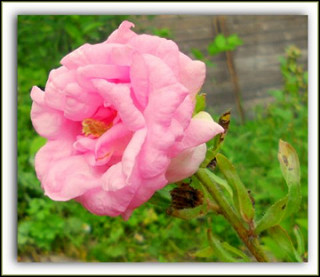

In [ ]:
#Rose img
PIL.Image.open(roses[1])

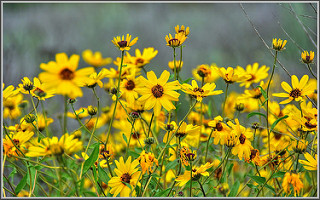

In [ ]:
#sunflower
PIL.Image.open(sunflower[1])

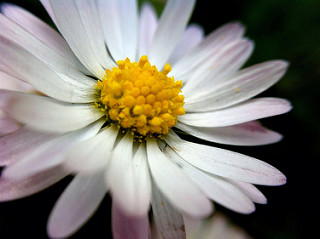

In [ ]:
#Daisy img
PIL.Image.open(daisy[1])

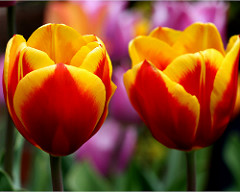

In [ ]:
#tulips img
PIL.Image.open(tulips[1])

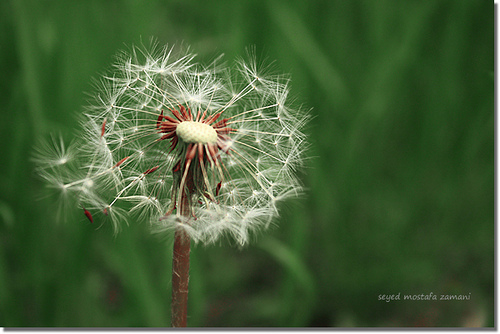

In [ ]:
#dandelion img
PIL.Image.open(dandelion[1])

#Read flowers images from disk into numpy array using opencv

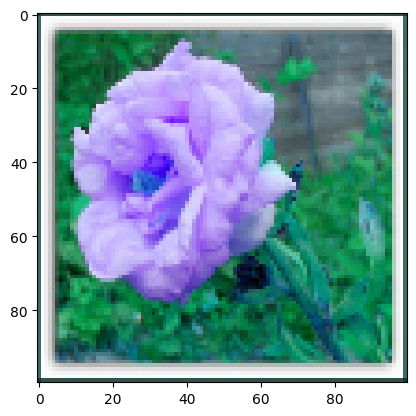

In [ ]:
img = cv2.imread(str(roses[1]))
resize_rose = cv2.resize(img,(100,100))
plt.imshow(resize_rose)

In [ ]:
resize_rose.shape

(100, 100, 3)

In [ ]:
flower_img_name = {
    'roses': roses,
    'sunflowers': sunflower,
    'daisy': daisy,
    'tulips': tulips,
    'dandelion': dandelion
}

flower_labels = {
    'roses': 0,
    'sunflowers': 1,
    'daisy': 2,
    'tulips': 3,
    'dandelion': 4
    }

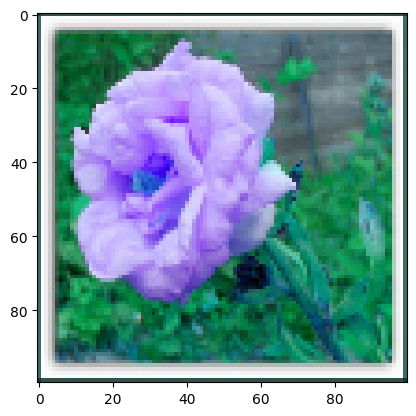

In [ ]:
temp1  = cv2.imread(flower_img_name['roses'][1])
temp2 = cv2.resize(temp1,(100,100))
plt.imshow(temp2)

In [ ]:
x = []
y = []
for flower_name , images in flower_img_name.items():
  for img in images:
    temp_img = cv2.imread(str(img))
    resize_img = cv2.resize(temp_img,(100,100))
    x.append(resize_img)
    y.append(flower_labels[flower_name])

In [ ]:
x[:2]

[array([[[  3,   6,   4],
         [  4,   7,   5],
         [  2,   9,   6],
         ...,
         [ 62,  95,  55],
         [ 56,  88,  52],
         [ 48,  96,  55]],
 
        [[  1,   3,   3],
         [  1,   3,   3],
         [  3,   7,   6],
         ...,
         [ 57, 101,  69],
         [ 63, 106,  59],
         [ 56, 101,  61]],
 
        [[  1,   3,   3],
         [  1,   3,   2],
         [  2,   6,   4],
         ...,
         [ 57, 116,  76],
         [ 61, 122,  79],
         [ 69, 115,  72]],
 
        ...,
 
        [[ 36,  56,  33],
         [ 27,  47,  27],
         [ 14,  44,  15],
         ...,
         [ 41,  40,  41],
         [ 60,  60,  65],
         [ 71,  83,  89]],
 
        [[ 34,  56,  31],
         [ 27,  49,  26],
         [ 27,  46,  24],
         ...,
         [ 54,  59,  60],
         [ 75,  76,  74],
         [ 73,  84,  91]],
 
        [[ 21,  39,  22],
         [ 30,  46,  31],
         [ 32,  51,  27],
         ...,
         [ 54,  52,  48],
  

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
x = np.array(x)
y = np.array(y)
x.shape

(3680, 100, 100, 3)

Train test split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

#Preprocessing: scale images

In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [ ]:
x_train_scaled[:2]

array([[[[0.02352941, 0.86666667, 0.31372549],
         [0.        , 0.8627451 , 0.34901961],
         [0.0627451 , 0.8627451 , 0.35294118],
         ...,
         [0.01960784, 0.8745098 , 0.35294118],
         [0.04705882, 0.85882353, 0.3254902 ],
         [0.00392157, 0.86666667, 0.34901961]],

        [[0.03137255, 0.86666667, 0.35686275],
         [0.31764706, 0.41960784, 0.38039216],
         [0.33333333, 0.52941176, 0.4745098 ],
         ...,
         [0.0627451 , 0.04313725, 0.07843137],
         [0.02352941, 0.02352941, 0.00392157],
         [0.01960784, 0.90980392, 0.38431373]],

        [[0.04313725, 0.87058824, 0.37254902],
         [0.36078431, 0.5372549 , 0.44705882],
         [0.44313725, 0.77254902, 0.61568627],
         ...,
         [0.03921569, 0.05882353, 0.02745098],
         [0.        , 0.01568627, 0.01960784],
         [0.01568627, 0.91372549, 0.36078431]],

        ...,

        [[0.00784314, 0.85490196, 0.33333333],
         [0.0627451 , 0.04313725, 0.0627451 ]

#Build a CNN

In [ ]:
num_classes = 5
model = keras.Sequential([
    #cnn
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),

    #ANN
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)


 ])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [ ]:

model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3218 - loss: 1.5063
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5512 - loss: 1.1136
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6493 - loss: 0.9107
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7151 - loss: 0.7612
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7625 - loss: 0.6407
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7940 - loss: 0.5411
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8297 - loss: 0.4586
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8858 - loss: 0.3372
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9257 - loss: 0.2208
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9563 - loss: 0.1428


In [ ]:
model.evaluate(x_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7036 - loss: 1.0652


[1.121718168258667, 0.6915760636329651]

In [ ]:
y_pred = model.predict(x_test_scaled)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
score = tf.nn.softmax(y_pred[6])
np.argmax(score)


2

In [ ]:
y_test[6]

2

In [ ]:

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
img_height, img_width =100,100

data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


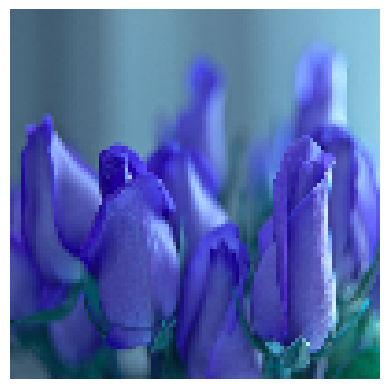

In [ ]:
plt.axis('off')
plt.imshow(x[500])

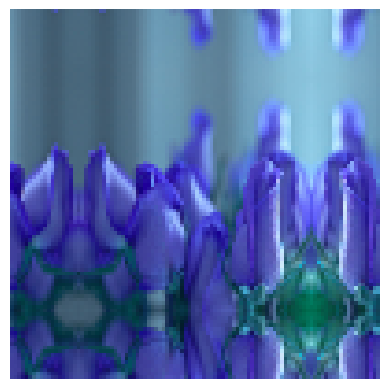

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[500].numpy().astype("uint8"))

#Train the model using data augmentation and a drop out layer

In [ ]:
16*6

96

In [ ]:
num_classes = 5
model_1 = keras.Sequential([
    #adding data augmentation
    data_augmentation,
    #cnn
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),

    layers.Flatten(),

    #ANN
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)


 ])
model_1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [ ]:
model_1.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3201 - loss: 1.5207
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5468 - loss: 1.1215
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6245 - loss: 0.9869
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6226 - loss: 0.9498
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6571 - loss: 0.8744
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6879 - loss: 0.8080
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6963 - loss: 0.7774
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6956 - loss: 0.7624
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7289 - loss: 0.6995
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7524 - loss: 0.6579


In [ ]:
model_1.evaluate(x_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7100 - loss: 0.7501


[0.7557831406593323, 0.7010869383811951]

In [ ]:
y_pred_1 = model_1.predict(x_test_scaled)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
score = tf.nn.softmax(y_pred[1])
predicted_class_index=np.argmax(score)

In [ ]:
y_test[1]

4

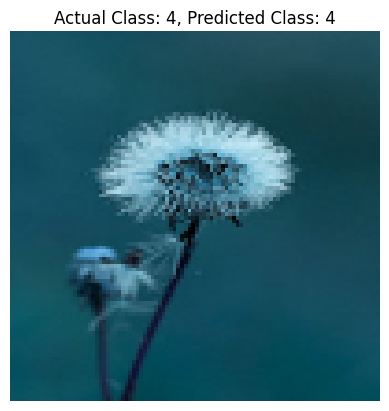

In [ ]:
plt.imshow(x_test_scaled[1])  # Display the image at index 1
plt.title(f"Actual Class: {y_test[1]}, Predicted Class: {predicted_class_index}")
plt.axis('off')
plt.show()

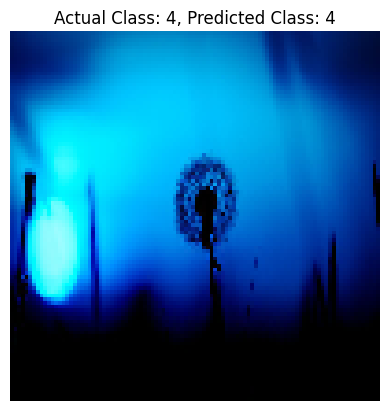

In [ ]:
plt.imshow(x_test_scaled[100])  # Display the image at index 1
plt.title(f"Actual Class: {y_test[100]}, Predicted Class: {predicted_class_index}")
plt.axis('off')
plt.show()

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%

Text(95.72222222222221, 0.5, 'Truth')

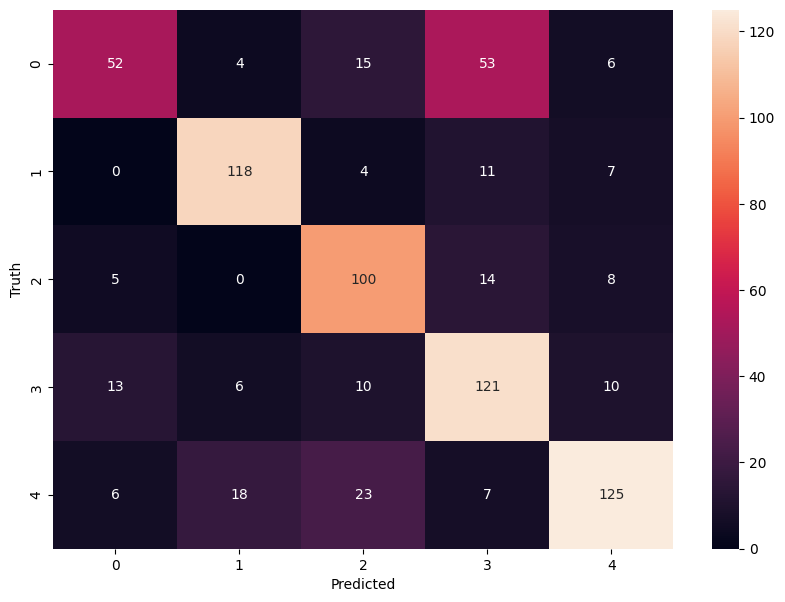

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_pred_classes = np.argmax(y_pred_1, axis=1)

# Generate confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_classes)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50       130
           1       0.81      0.84      0.83       140
           2       0.66      0.79      0.72       127
           3       0.59      0.76      0.66       160
           4       0.80      0.70      0.75       179

    accuracy                           0.70       736
   macro avg       0.71      0.70      0.69       736
weighted avg       0.71      0.70      0.70       736

